## Sales of retail stores

## Steps to be followed
1. Data collection
2. Importing libraries
3. Importing datasets
4. Preprocessing
5. Identifying and handling missing values
6. Visualization
7. Encoding categorical features to numerical
8. Splitting the data
9. Scaling
10. Model building
11. model performance

## 1. Dataset collected from team lead

## 2. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import re

## 3. Importing datasets

In [2]:
import pandas as pd
Sales1 = pd.read_csv('/content/date_to_week_id_map.csv')
Sales2 = pd.read_csv('/content/product_prices.csv')
Sales3 = pd.read_csv('/content/train_data.csv')
Sales4 = pd.read_csv('/content/test_data.csv')

In [3]:
print(Sales1.shape)
print(Sales2.shape)
print(Sales3.shape)
print(Sales4.shape)

(821, 2)
(59000, 4)
(395000, 7)
(15500, 7)


## 4. Preprocessing

In [4]:
Sales1.head()

,date,week_id
0,2012-01-01,49
1,2012-01-02,49
2,2012-01-03,49
3,2012-01-04,49
4,2012-01-05,49


In [5]:
Sales2.head()

,outlet,product_identifier,week_id,sell_price
0,111,74,49,2.94
1,111,74,50,2.94
2,111,74,51,2.94
3,111,74,52,2.94
4,111,74,53,2.94


In [6]:
Sales3.head()

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales
0,2012-01-01,74,11,others,111,Maharashtra,0
1,2012-01-01,337,11,others,111,Maharashtra,1
2,2012-01-01,423,12,others,111,Maharashtra,0
3,2012-01-01,432,12,others,111,Maharashtra,0
4,2012-01-01,581,21,fast_moving_consumer_goods,111,Maharashtra,0


In [7]:
Sales3=Sales3.drop(['sales'],axis = 1)

In [8]:
Sales4.head()

,id,date,product_identifier,department_identifier,category_of_product,outlet,state
0,1,2014-03-01,74,11,others,111,Maharashtra
1,2,2014-03-01,337,11,others,111,Maharashtra
2,3,2014-03-01,423,12,others,111,Maharashtra
3,4,2014-03-01,432,12,others,111,Maharashtra
4,5,2014-03-01,581,21,fast_moving_consumer_goods,111,Maharashtra


In [9]:
Sales4 = Sales4.drop(['id'], axis=1)

In [10]:
df1 = pd.merge(Sales1, Sales2, on=['week_id'])

In [11]:
df1.columns

Index(['date', 'week_id', 'outlet', 'product_identifier', 'sell_price'], dtype='object')

In [12]:
df_train = pd.merge(df1, Sales3)

In [13]:
df_train.columns

Index(['date', 'week_id', 'outlet', 'product_identifier', 'sell_price',
       'department_identifier', 'category_of_product', 'state'],
      dtype='object')

In [14]:
df_train.head()

,date,week_id,outlet,product_identifier,sell_price,department_identifier,category_of_product,state
0,2012-01-01,49,111,74,2.94,11,others,Maharashtra
1,2012-01-01,49,111,337,7.44,11,others,Maharashtra
2,2012-01-01,49,111,423,0.97,12,others,Maharashtra
3,2012-01-01,49,111,432,4.97,12,others,Maharashtra
4,2012-01-01,49,111,581,4.88,21,fast_moving_consumer_goods,Maharashtra


In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395000 entries, 0 to 394999
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   date                   395000 non-null  object 
 1   week_id                395000 non-null  int64  
 2   outlet                 395000 non-null  int64  
 3   product_identifier     395000 non-null  int64  
 4   sell_price             395000 non-null  float64
 5   department_identifier  395000 non-null  int64  
 6   category_of_product    395000 non-null  object 
 7   state                  395000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 27.1+ MB


In [16]:
df_train.shape

(395000, 8)

In [17]:
df_test = pd.merge(df1, Sales4)

In [18]:
df_test.head()

,date,week_id,outlet,product_identifier,sell_price,department_identifier,category_of_product,state
0,2014-03-01,162,111,74,3.43,11,others,Maharashtra
1,2014-03-01,162,111,337,7.78,11,others,Maharashtra
2,2014-03-01,162,111,423,0.97,12,others,Maharashtra
3,2014-03-01,162,111,432,4.97,12,others,Maharashtra
4,2014-03-01,162,111,581,4.88,21,fast_moving_consumer_goods,Maharashtra


In [19]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15500 entries, 0 to 15499
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   15500 non-null  object 
 1   week_id                15500 non-null  int64  
 2   outlet                 15500 non-null  int64  
 3   product_identifier     15500 non-null  int64  
 4   sell_price             15500 non-null  float64
 5   department_identifier  15500 non-null  int64  
 6   category_of_product    15500 non-null  object 
 7   state                  15500 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 1.1+ MB


In [20]:
df_test.shape

(15500, 8)

## 5. Identifying and handling missing values

In [21]:
print('train','\n')
print(df_train.isna().sum())
print('test','\n')
print(df_test.isna().sum())

train 

date                     0
week_id                  0
outlet                   0
product_identifier       0
sell_price               0
department_identifier    0
category_of_product      0
state                    0
dtype: int64
test 

date                     0
week_id                  0
outlet                   0
product_identifier       0
sell_price               0
department_identifier    0
category_of_product      0
state                    0
dtype: int64


In [22]:
df_train.isna().mean()*100

date                     0.0
week_id                  0.0
outlet                   0.0
product_identifier       0.0
sell_price               0.0
department_identifier    0.0
category_of_product      0.0
state                    0.0
dtype: float64

In [23]:
df_test.isna().mean()*100

date                     0.0
week_id                  0.0
outlet                   0.0
product_identifier       0.0
sell_price               0.0
department_identifier    0.0
category_of_product      0.0
state                    0.0
dtype: float64

In [24]:
df_train.describe()

,week_id,outlet,product_identifier,sell_price,department_identifier
count,395000.000000,395000.000000,395000.000000,395000.000000,395000.000000
mean,105.070886,211.200000,1509.960000,4.987644,24.460000
std,32.578749,91.161291,809.799518,3.874444,6.337863
min,49.000000,111.000000,74.000000,0.050000,11.000000
25%,77.000000,113.000000,926.000000,2.680000,21.000000
50%,105.000000,221.500000,1325.000000,3.980000,22.000000
75%,133.000000,331.000000,1753.000000,6.480000,31.000000
max,161.000000,333.000000,3021.000000,44.360000,33.000000


In [25]:
df_test.describe()

,week_id,outlet,product_identifier,sell_price,department_identifier
count,15500.000000,15500.000000,15500.000000,15500.000000,15500.000000
mean,163.741935,211.200000,1509.960000,4.988229,24.460000
std,1.294390,91.164117,809.824616,3.879690,6.338059
min,162.000000,111.000000,74.000000,0.200000,11.000000
25%,163.000000,113.000000,926.000000,2.640000,21.000000
50%,164.000000,221.500000,1325.000000,3.970000,22.000000
75%,165.000000,331.000000,1753.000000,6.680000,31.000000
max,166.000000,333.000000,3021.000000,25.970000,33.000000


<Axes: >

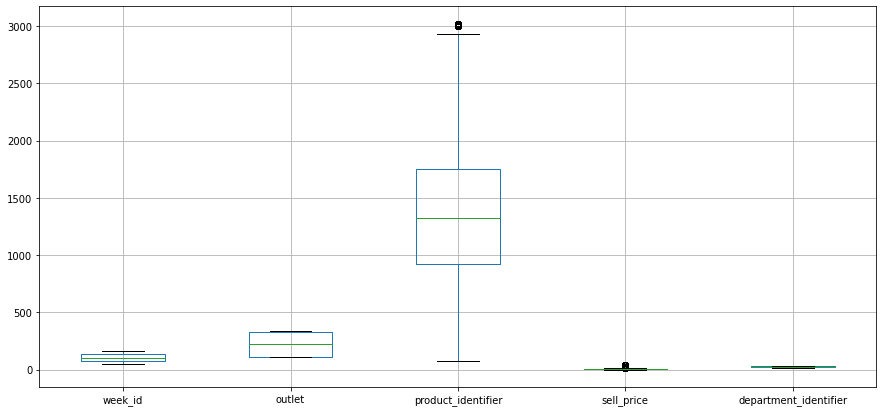

In [26]:
#boxplot to check the outliers
plt.figure(figsize = (15, 7)) 
df_train.boxplot()

<Axes: >

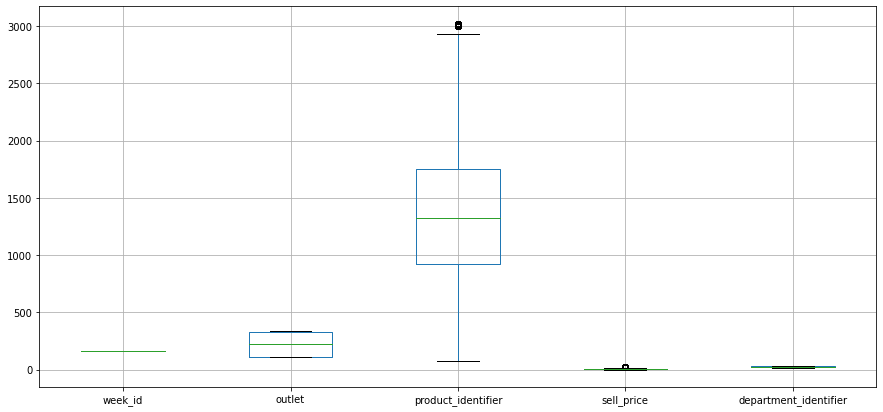

In [27]:
#boxplot to check the outliers
plt.figure(figsize = (15, 7)) 
df_test.boxplot()

<Axes: xlabel='product_identifier', ylabel='Density'>

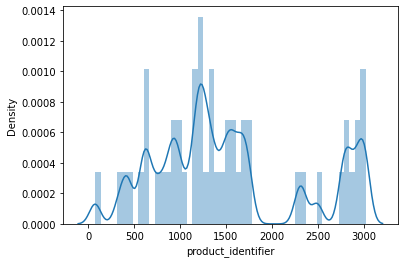

In [28]:
#Need to handle with outliers
sns.distplot(df_train['product_identifier'])

<Axes: xlabel='product_identifier', ylabel='Density'>

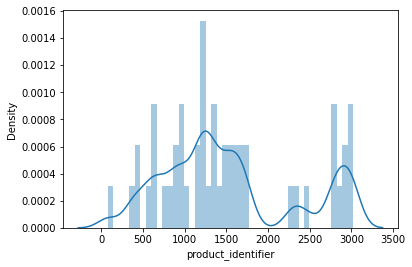

In [29]:
sns.distplot(df_test['product_identifier'])

In [30]:
## calculating inter quantile range
Q3 = df_train.product_identifier.quantile(0.75)
Q1 = df_train.product_identifier.quantile(0.25)
IQR = Q3 - Q1
IQR

827.0

In [31]:
## calculating inter quantile range
Q3 = df_test.product_identifier.quantile(0.75)
Q1 = df_test.product_identifier.quantile(0.25)
IQR = Q3 - Q1
IQR

827.0

In [32]:
#Outlier 
lower_bridge = df_train['product_identifier'].quantile(0.25)-(IQR*1.5)
upper_bridge = df_train['product_identifier'].quantile(0.75)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-314.5
2993.5


In [33]:
#Outlier 
lower_bridge = df_test['product_identifier'].quantile(0.25)-(IQR*1.5)
upper_bridge = df_test['product_identifier'].quantile(0.75)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-314.5
2993.5


In [34]:
# filling outlier with fixed value
df_train.loc[df_train['product_identifier']>=2993, 'product_identifier']=2993

In [35]:
# filling outlier with fixed value
df_test.loc[df_test['product_identifier']>=2993, 'product_identifier']=2993

<Axes: xlabel='product_identifier', ylabel='Density'>

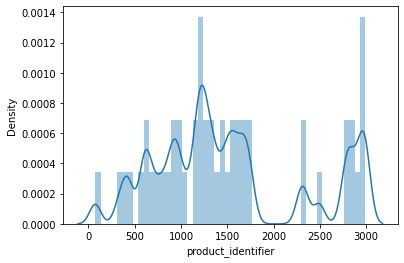

In [36]:
#Need to handle with outliers
sns.distplot(df_train['product_identifier'])

<Axes: xlabel='product_identifier', ylabel='Density'>

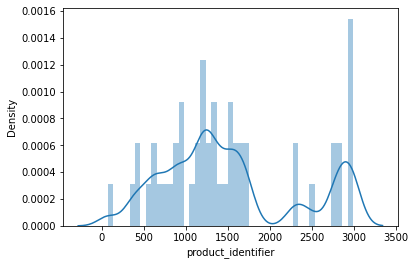

In [37]:
#Need to handle with outliers
sns.distplot(df_test['product_identifier'])

<Axes: xlabel='sell_price', ylabel='Density'>

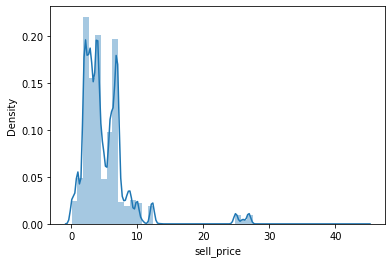

In [38]:
#Need to handle with outliers
sns.distplot(df_train['sell_price'])

<Axes: xlabel='sell_price', ylabel='Density'>

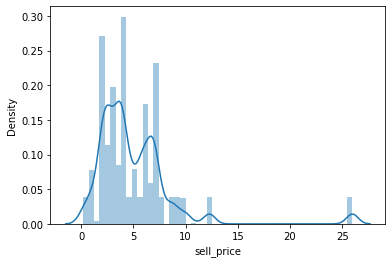

In [39]:
#Need to handle with outliers
sns.distplot(df_test['sell_price'])

In [40]:
## calculating inter quantile range
Q3 = df_train.sell_price.quantile(0.75)
Q1 = df_train.sell_price.quantile(0.25)
IQR = Q3 - Q1
IQR

3.8000000000000003

In [41]:
## calculating inter quantile range
Q3 = df_test.sell_price.quantile(0.75)
Q1 = df_test.sell_price.quantile(0.25)
IQR = Q3 - Q1
IQR

4.039999999999999

In [42]:
#Outlier 
lower_bridge = df_train['sell_price'].quantile(0.25)-(IQR*1.5)
upper_bridge = df_train['sell_price'].quantile(0.75)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-3.3799999999999986
12.54


In [43]:
#Outlier 
lower_bridge = df_test['sell_price'].quantile(0.25)-(IQR*1.5)
upper_bridge = df_test['sell_price'].quantile(0.75)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-3.4199999999999986
12.739999999999998


In [44]:
# filling outlier with fixed value
df_train.loc[df_train['sell_price']>=12, 'sell_price']=12

In [45]:
# filling outlier with fixed value
df_test.loc[df_test['sell_price']>=12, 'sell_price']=12

<Axes: xlabel='sell_price', ylabel='Density'>

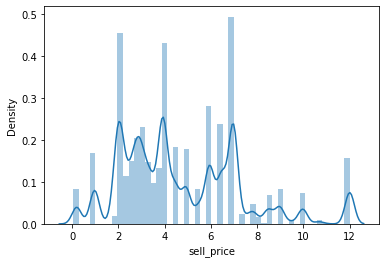

In [46]:
#Need to handle with outliers
sns.distplot(df_train['sell_price'])

<Axes: xlabel='sell_price', ylabel='Density'>

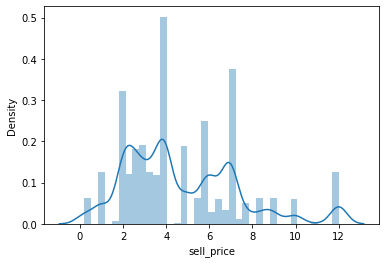

In [47]:
#Need to handle with outliers
sns.distplot(df_test['sell_price'])

In [48]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395000 entries, 0 to 394999
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   date                   395000 non-null  object 
 1   week_id                395000 non-null  int64  
 2   outlet                 395000 non-null  int64  
 3   product_identifier     395000 non-null  int64  
 4   sell_price             395000 non-null  float64
 5   department_identifier  395000 non-null  int64  
 6   category_of_product    395000 non-null  object 
 7   state                  395000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 27.1+ MB


In [49]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15500 entries, 0 to 15499
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   15500 non-null  object 
 1   week_id                15500 non-null  int64  
 2   outlet                 15500 non-null  int64  
 3   product_identifier     15500 non-null  int64  
 4   sell_price             15500 non-null  float64
 5   department_identifier  15500 non-null  int64  
 6   category_of_product    15500 non-null  object 
 7   state                  15500 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 1.1+ MB


In [50]:
# Convert the column to datetime
#df['date'] = pd.to_datetime(df['date'])

In [51]:
#df.info()

In [52]:
#df.head()

In [53]:
#df = df.drop(['date'],axis=1)

In [54]:
# split the date column into day, month, and year columns
df_train[['day', 'month', 'year']] = df_train['date'].str.split('-', expand=True)

In [55]:
# split the date column into day, month, and year columns
df_test[['day', 'month', 'year']] = df_test['date'].str.split('-', expand=True)

## 6. Visualization

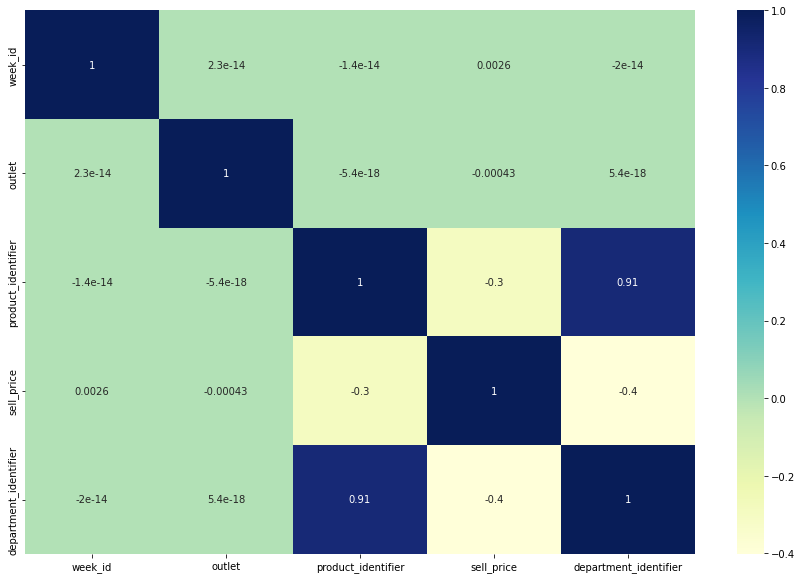

In [56]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (15, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

<Axes: xlabel='week_id', ylabel='Density'>

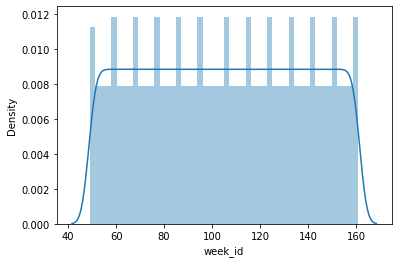

In [57]:
#Need to handle with outliers
sns.distplot(df_train['week_id'])

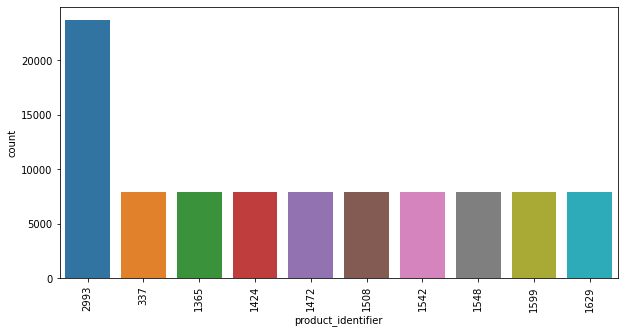

In [58]:
fig, ax = plt.subplots(figsize=(10,5))
ax.tick_params(axis='x', rotation=90)
y_count=sns.countplot(x='product_identifier',data=df_train, ax = ax, order = df_train['product_identifier'].value_counts().iloc[:10].index)

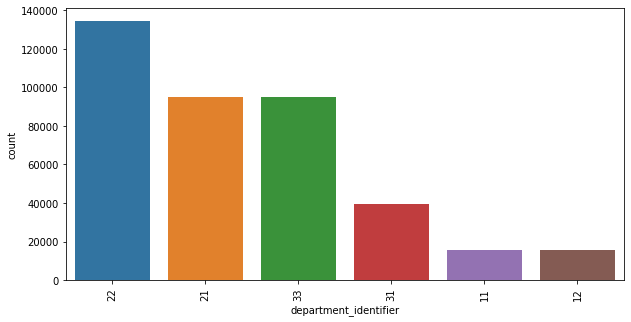

In [59]:
fig, ax = plt.subplots(figsize=(10,5))
ax.tick_params(axis='x', rotation=90)
y_count=sns.countplot(x='department_identifier',data=df_train, ax = ax, order =df_train['department_identifier'].value_counts().iloc[:20].index)

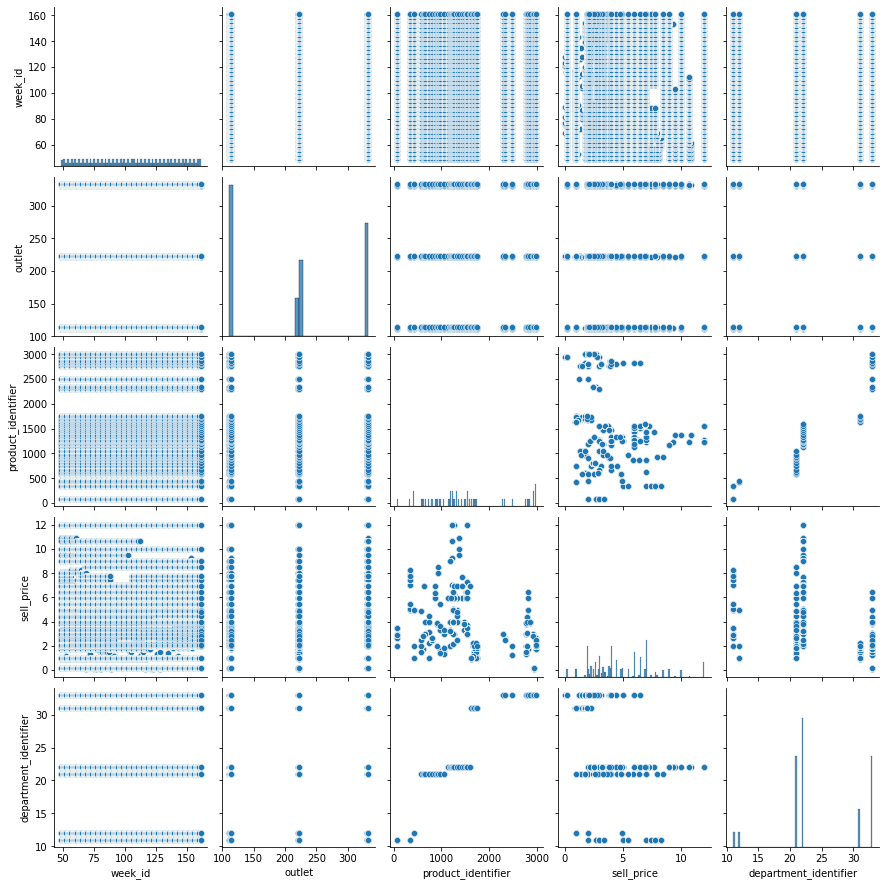

In [60]:
sns.pairplot(df_train)

In [61]:
df_train.head()

,date,week_id,outlet,product_identifier,sell_price,department_identifier,category_of_product,state,day,month,year
0,2012-01-01,49,111,74,2.94,11,others,Maharashtra,2012,01,01
1,2012-01-01,49,111,337,7.44,11,others,Maharashtra,2012,01,01
2,2012-01-01,49,111,423,0.97,12,others,Maharashtra,2012,01,01
3,2012-01-01,49,111,432,4.97,12,others,Maharashtra,2012,01,01
4,2012-01-01,49,111,581,4.88,21,fast_moving_consumer_goods,Maharashtra,2012,01,01


In [62]:
#df = df.drop(['product_identifier'],axis=1)

In [63]:
df_train.head()

,date,week_id,outlet,product_identifier,sell_price,department_identifier,category_of_product,state,day,month,year
0,2012-01-01,49,111,74,2.94,11,others,Maharashtra,2012,01,01
1,2012-01-01,49,111,337,7.44,11,others,Maharashtra,2012,01,01
2,2012-01-01,49,111,423,0.97,12,others,Maharashtra,2012,01,01
3,2012-01-01,49,111,432,4.97,12,others,Maharashtra,2012,01,01
4,2012-01-01,49,111,581,4.88,21,fast_moving_consumer_goods,Maharashtra,2012,01,01


In [64]:
df_train['state'].nunique()

3

In [65]:
df_train['category_of_product'].nunique()

3

## 7. Encoding from categorical features to numerical

In [66]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [67]:
df_train['category_of_product'] = le.fit_transform(df_train['category_of_product'])
df_train['state'] = le.fit_transform(df_train['state'])

In [68]:
df_test['category_of_product'] = le.fit_transform(df_test['category_of_product'])
df_test['state'] = le.fit_transform(df_test['state'])

In [69]:
df_train.head()

,date,week_id,outlet,product_identifier,sell_price,department_identifier,category_of_product,state,day,month,year
0,2012-01-01,49,111,74,2.94,11,2,1,2012,01,01
1,2012-01-01,49,111,337,7.44,11,2,1,2012,01,01
2,2012-01-01,49,111,423,0.97,12,2,1,2012,01,01
3,2012-01-01,49,111,432,4.97,12,2,1,2012,01,01
4,2012-01-01,49,111,581,4.88,21,1,1,2012,01,01


In [70]:
df_train.tail()

,date,week_id,outlet,product_identifier,sell_price,department_identifier,category_of_product,state,day,month,year
394995,2014-02-28,161,333,2932,2.78,33,0,0,2014,02,28
394996,2014-02-28,161,333,2935,0.20,33,0,0,2014,02,28
394997,2014-02-28,161,333,2993,2.50,33,0,0,2014,02,28
394998,2014-02-28,161,333,2993,1.98,33,0,0,2014,02,28
394999,2014-02-28,161,333,2993,2.08,33,0,0,2014,02,28


In [71]:
#df = pd.get_dummies(df)

In [72]:
df_train = df_train.drop(['date'],axis=1)
df_test = df_test.drop(['date'],axis=1)

In [73]:
# seperating the dependent and independent variables
X_train = df_train.drop("sell_price", axis = 1)
y_train = df_train["sell_price"]

In [74]:
# seperating the dependent and independent variables
X_test = df_test.drop("sell_price", axis = 1)
y_test = df_test["sell_price"]

In [75]:
X_train.head()

,week_id,outlet,product_identifier,department_identifier,category_of_product,state,day,month,year
0,49,111,74,11,2,1,2012,01,01
1,49,111,337,11,2,1,2012,01,01
2,49,111,423,12,2,1,2012,01,01
3,49,111,432,12,2,1,2012,01,01
4,49,111,581,21,1,1,2012,01,01


## 9. Feature Scaling

In [76]:
##normalising the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [77]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test) 

## 10. Model building

In [78]:
from sklearn.neighbors import KNeighborsRegressor

In [79]:
model = KNeighborsRegressor()

In [80]:
model = model.fit(X_train, y_train)

In [81]:
model.score(X_train, y_train)*100

78.80672589085536

In [82]:
y_pred_lr = model.predict(X_test)

## 11. Model performance

In [83]:
from sklearn import metrics
print('KNNRegression')
print('r2_score', "{:.2f}".format(metrics.r2_score(y_test,y_pred_lr)*100))
score = metrics.r2_score(y_test,y_pred_lr)
a_r2 = 1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adjusted_r2_score',"{:.2f}".format(a_r2*100))
print('MAE:', "{:.2f}".format(metrics.mean_absolute_error(y_test, y_pred_lr)))
#print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', "{:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr))))

KNNRegression
r2_score 78.30
Adjusted_r2_score 78.29
MAE: 0.94
RMSE: 1.24


# without sklearn

In [84]:
import numpy as np

class KNNRegressor:
    def __init__(self, k):
        self.k = k
        
    def fit(self, X, y):
        self.X = np.array(X)
        self.y = np.array(y)
        
    def predict(self, X_test):
        y_pred = []
        for x in X_test:
            dist = np.sqrt(np.sum((self.X - x) ** 2, axis=1))
            idx = np.argsort(dist)[:self.k]
            y_pred.append(np.mean(self.y[idx]))
        return np.array(y_pred)

In [85]:
knn = KNNRegressor(k=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(y_pred)

[3.43 7.78 0.97 ... 2.03 2.03 2.03]


In [86]:
import numpy as np

def r2_score(y_test, y_pred):
    sse = np.sum((y_test - y_pred) ** 2)
    sst = np.sum((y_test - np.mean(y_test)) ** 2)
    r2 = 1 - sse / sst
    return r2


In [87]:
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2*100)

R-squared: 90.49083553877733


In [88]:
import numpy as np

def mean_absolute_error(y_test, y_pred):
    mae = np.mean(np.abs(y_test - y_pred))
    return mae


In [89]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error:", mae)

Mean absolute error: 0.388676129032258


In [90]:
import numpy as np

def mean_squared_error(y_test, y_pred):
    mse = np.mean((y_test - y_pred) ** 2)
    return mse

In [91]:
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

Mean squared error: 0.6724242290322581


In [92]:
import pickle
# open a file, where you ant to store the data
file = open('knn.pkl', 'wb')

# dump information to that file
pickle.dump(knn, file)
file.close()